In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from ModulesPath.plotUtil import Fig
import subjects

sess = subjects.Sd().ratSday3[0]

In [ ]:
spikes_folder = "/data/Clustering/SleepDeprivation/RatN/Day1/spykcirc/clus_combined"
sess.neurons.from_Phy(spikes_folder)

In [ ]:
file = "/data/Clustering/SleepDeprivation/RatN/Day1/RatN_Day1_2019-10-09_03-52-32.test_position.npy"

data = np.load(file, allow_pickle=True).item()

data

In [ ]:
import numpy as np
import pandas as pd
from ModulesPath.core import Epoch

a = pd.DataFrame({"start": [1, 2, 3], "stop": [3, 4, 5], "label": [3, 4, 6]})

b = np.where(a["label"] == 3)[0]

a.loc[0][["start", "stop"]].values

d = pd.DataFrame(columns=["start", "stop"])

d.empty


## Convert paradigm epochs to current format

In [ ]:
import pandas as pd
import numpy as np

file = "/data/Clustering/SleepDeprivation/RatN/Day2/RatN_Day2_2019-10-11_03-58-54_epochs.npy"

data = np.load(file, allow_pickle=True).item()

epochs = pd.DataFrame(data)
a = epochs.T.reset_index()

epochs_new = pd.DataFrame(
    {"start": a[0], "stop": a[1], "label": a["index"].str.lower()}
)
metadata = None

data = {"epochs": epochs_new, "metadata": metadata}

# np.save(file[:-11] + ".paradigm.npy", data)


In [ ]:
epochs_new

## Convert artifact to current format

In [ ]:
import pandas as pd
import numpy as np

file = "/data/Clustering/SleepDeprivation/RatS/Day3SD/RatS_Day3SD_2020-11-29_07-53-30.artifact.npy"

data = np.load(file, allow_pickle=True).item()

epochs = pd.DataFrame(
    {"start": data["time"][:, 0], "stop": data["time"][:, 1], "label": ""}
)
metadata = {"channels": data["channel"], "thresh": data["threshold"]}
data = {"epochs": epochs, "metadata": metadata}

# np.save(file, data)


In [ ]:
class A:
    def __init__(self) -> None:
        pass


class B(A):
    def __init__(self) -> None:
        pass


a = B()

isinstance(a, B)


In [ ]:
import pandas as pd

a = pd.DataFrame({"a": [1, 2], "b": [3, 5]})
b = pd.DataFrame({"a": [7, 8], "b": [3, 5], "c": [3, 4]})

c = a.append(b)
np.__version__

In [ ]:
import subjects
from ModulesPath.core import Position, Track

sess = subjects.Sd().ratSday3[0]

pos = Position(
    time=sess.position.t,
    x=sess.position.x,
    y=sess.position.y,
    sampling_rate=int(sess.position.tracking_sRate),
)

int(pos.sampling_rate)

pos.linearize(period=sess.paradigm.maze1, sample_sec=3)
pos.linearize(period=sess.paradigm.maze2, sample_sec=3)


In [ ]:
import numpy as np
from probeinterface import Probe, ProbeGroup
from probeinterface.plotting import plot_probe_group, plot_probe

n = 24
positions = np.zeros((n, 2))
for i in range(n):
    x = i // 8
    y = i % 8
    positions[i] = x, y
positions *= 20
positions[8:16, 1] -= 10

probe_2d = Probe(ndim=2, si_units="um")
probe_2d.set_contacts(positions=positions, shapes="circle", shape_params={"radius": 5})
probe_2d.create_auto_shape(probe_type="tip")


In [ ]:
probe_2d.annotations

In [ ]:
import numpy as np
from ModulesPath.core import Shank, Probe

# from ModulesPath.sessobj import recinfo

shank = Shank()
probe = Probe(shanks=[shank, shank])


In [ ]:
# shanks = [shank,shank]
# assert np.all([isinstance(_,Shank) for _ in shanks])
shank.__class__.__name__ == "Shank"


In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt

plt.plot(a.x,a.y,'*')

In [ ]:
from neo.io import RawBinarySignalIO
import quantities as pq

file = (
    "/data/Clustering/SleepDeprivation/RatR/Day2SD/RatR_Day2SD_2021-05-23_09-07-18.eeg"
)
reader = RawBinarySignalIO(filename=file, sampling_rate=1250, nb_channel=128)


In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.plot(a)

In [ ]:
import numpy as np
from ModulesPath.io import NeuroscopeIO

In [ ]:
info = NeuroscopeIO(
    "/data/Clustering/SleepDeprivation/RatJ/Day1/RatJ_Day1_2019-05-31_03-55-36.xml"
)


In [ ]:
from pathlib import Path

folder = Path("/data/Clustering/SleepDeprivation/RatJ/Day1")
a = folder.glob("*.xml")
for file in folder.iterdir():
    if file.suffix == ".xml":
        print(file.name)


In [ ]:
from pathlib import Path
import numpy as np
from ModulesPath.proc_data import ProcessData

In [ ]:
folder = Path("/data/Clustering/SleepDeprivation/RatJ/Day1")
sess = ProcessData(folder)

In [ ]:
from ModulesPath.core import Shank, Probe, ProbeGroup

probe1 = Probe(shanks=[Shank(), Shank()])
probe2 = Probe(shanks=[Shank(), Shank()])
probe2.move((800, 0))

probegrp = ProbeGroup()
probegrp.add_probe(probe1)
probegrp.add_probe(probe2)

In [ ]:
probegrp.n_probes

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
a = probegrp.to_dataframe()
plt.plot(a['x'],a['y'],'.')


In [ ]:
import numpy as np
import pandas as pd

a = pd.DataFrame(columns=["x", "y"])


In [ ]:
import numpy as np

a = np.arange(
    np.datetime64("2019-10-09 03:52:32"),
    np.datetime64("2019-10-09 06:52:32"),
    np.timedelta64(333, "us"),
)
a = np.array([np.array([1, 2, 3]), np.array([2, 3, 5, 2])], dtype=object)


In [ ]:
import numpy as np

file = "/data/Clustering/SleepDeprivation/RatN_Day1_test_neuropy/RatN_Day1_2019-10-09_03-52-32.eeg"
data = np.memmap(file, dtype="int16", mode="r")
data = np.memmap.reshape(data, (len(data) // 134, 134)).T


In [ ]:
from ModulesPath.io import BinarysignalIO

d2 = BinarysignalIO(file, sampling_rate=1250, n_channels=134)


In [ ]:
sig = d2.get_signal(channels=[1, 5])


In [ ]:
sig.time_slice([0, 1], 0, 3000)


In [ ]:
a = np.array([False] * 134)
a[[1, 3]] = True
b = np.ones(data.shape[1], dtype=bool)
b

In [ ]:
class A(np.ndarray):
    def __init__(self, data) -> None:
        super().__init__()


m = A([1, 2, 34])


In [ ]:
from spikeextractors import BinDatRecordingExtractor

a = BinDatRecordingExtractor(file, sampling_frequency=1250, numchan=134, dtype="int16")
a._epochs

In [ ]:
a.get_traces(channel_ids=[1, 4])


In [ ]:
from neuropy.core import animal

a = animal.Animal()

In [ ]:
import numpy as np
from pathlib import Path

file = Path("/data/Clustering/SleepDeprivation/RatN_Day1_test_neuropy/params.py")

params = {}
with file.open("r") as f:
    for line in f:
        line_values = (
            line.replace("\n", "").replace('r"', '"').replace('"', "").split("=")
        )
        params[line_values[0].strip()] = line_values[1].strip()


params

In [2]:
import pandas as pd
from pathlib import Path

file = Path("/data/Clustering/SleepDeprivation/RatN_Day1_test_neuropy/cluster_info.tsv")
data = pd.read_csv(file, delimiter="\t")
a = data[data["group"].isin(["mua", "good"])].reset_index(drop=True)

b = np.arange(10)
for i in data.itertuples():
    np.where(b == i.id)


NameError: name 'np' is not defined

In [3]:
from pathlib import Path
from neuropy.io import PhyIO
from neuropy.core import Neurons

phy_data = PhyIO(
    Path(
        "/home/bapung/Documents/ClusteringHub/spykcirc/RatR/Day2SD/Allsession/RatR_Day2SD_2021-05-23_09-07-18-1.GUI"
    )
)

neurons = Neurons(
    phy_data.spiketrains, t_stop=53000, t_start=0, sampling_rate=phy_data.sampling_rate
)


In [2]:
import numpy as np
from neuropy.core import Position


x = np.random.randn(10)
y = np.random.randn(10)
z = np.random.randn(10)
t = np.arange(0,10)

pos = Position(t,x,y,z,sampling_rate=1)



<Axes3DSubplot:>

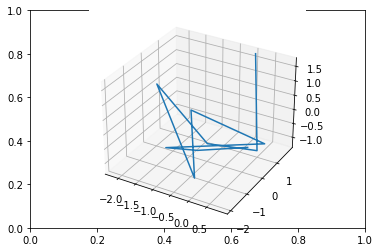

In [7]:
from neuropy import plotting

plotting.plot_position(pos)

In [12]:
a = np.array([1,2]).reshape(1,-1)

array([1, 2])

In [32]:
from neo.core import  Epoch
from quantities import s

a = Epoch()


In [27]:
import pandas as pd

df = pd.DataFrame({'a':[1,2,3],'b':[4,5,6]})

In [1]:
import numpy as np
b = np.array(['2001-01-01T12:00', '2002-02-03T13:56:03.172'], dtype='datetime64')

array(['2001-01-01T12:00:00.000', '2002-02-03T13:56:03.172'],
      dtype='datetime64[ms]')